In [1]:
import pandas as pd

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)
import numpy as np
import matplotlib.pyplot as plt



# Прогнозирование оттока клиентов в предстоящем периоде

In [2]:
def open_data(path):
    df = pd.read_csv(path, sep = ';')
    df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
    df['InvoiceTime'] = pd.to_datetime(df['InvoiceDate']).dt.hour
    df['InvoiceDate_Day'] = pd.to_datetime(df['InvoiceDate']).dt.date
    df['Sum'] = df['PricePerItem'] * df['Quantity']
    return df
    
df_in = open_data('data/train_data.csv')
print('Всего записей в таблице:', df_in.shape[0])
df_in.head()

Всего записей в таблице: 431673


,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,InvoiceTime,InvoiceDate_Day,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom,2010-01,8,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom,2010-01,8,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34



## Описание данных:

* InvoiceNo - Идентификатор тразакции
* ProductID - Идентификатор продукта
* Name - Наименвание продукта
* Quantity - Количество
* InvoiceDate - Дата и время тнзакции
* PricePerItem - Цена за единицу
* CustomerID - Идентификатор клиента
* Country - Страна клиента
* InvoiceMonth - Период в который была осуществленна сделка
* InvoiceTime - Время дня совершения сделки
* InvoiceDate_Day - Дата транзакции
* InvoiceDate_Day - Суммарная стоимость

## Очистка данных

In [3]:
df_clean = df_in
# Удаляем данные без указания клиента
df_clean = df_clean.dropna(subset=['CustomerID'])
month_list = df_clean.InvoiceMonth.unique()
df_clean.head()

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,InvoiceTime,InvoiceDate_Day,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom,2010-01,8,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom,2010-01,8,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34


## Общее ознакомление с данными

In [4]:
customers = df_clean.CustomerID.value_counts()
customers_count = len(customers)
customer_max_sum =  df_clean.loc[df_clean.CustomerID == customers.idxmax()]['Sum'].sum()
price_sum = df_clean['Sum'].sum()
Repeat_Purchase_Rate = round(len(customers[customers > 1]) / customers_count * 100, 2)

print('Всего клинтов: ', customers_count)
print('Процент клиентов совершивших повторную покупку:', Repeat_Purchase_Rate)
print('Максимальное количество покупок 1-го клиента: ', customers.max())
print('Он сделал покупок на сумму: ', customer_max_sum)
print('От общей суммы покупок это: ', round(customer_max_sum / price_sum *100, 3), '%')
print('Минимальное количество покупок 1-го клиента: ', customers.min())
print('Он сделал покупок на сумму: ', df_clean.loc[df_in.CustomerID == customers.idxmin()].PricePerItem.sum())
print('Общая сумма сделок совершенных за период: ', price_sum)

Всего клинтов:  4010
Процент клиентов совершивших повторную покупку: 98.1
Максимальное количество покупок 1-го клиента:  6087
Он сделал покупок на сумму:  30746.36
От общей суммы покупок это:  0.45 %
Минимальное количество покупок 1-го клиента:  1
Он сделал покупок на сумму:  0.72
Общая сумма сделок совершенных за период:  6825151.694


In [5]:
# Значения числовых параметров
df_clean[['Quantity', 'PricePerItem', 'Sum']].describe()

,Quantity,PricePerItem,Sum
count,323570.000000,323570.000000,323570.000000
mean,12.464496,3.592492,21.093277
std,190.848925,77.388355,231.408762
min,-74215.000000,0.000000,-77183.600000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.480000
75%,12.000000,3.750000,19.800000
max,74215.000000,38970.000000,77183.600000


array([<AxesSubplot:title={'center':'Sum_in_month'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Sum_returns_in_month'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Count_in_month'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Count_Customers'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Count_Name'}, xlabel='InvoiceMonth'>],
      dtype=object)

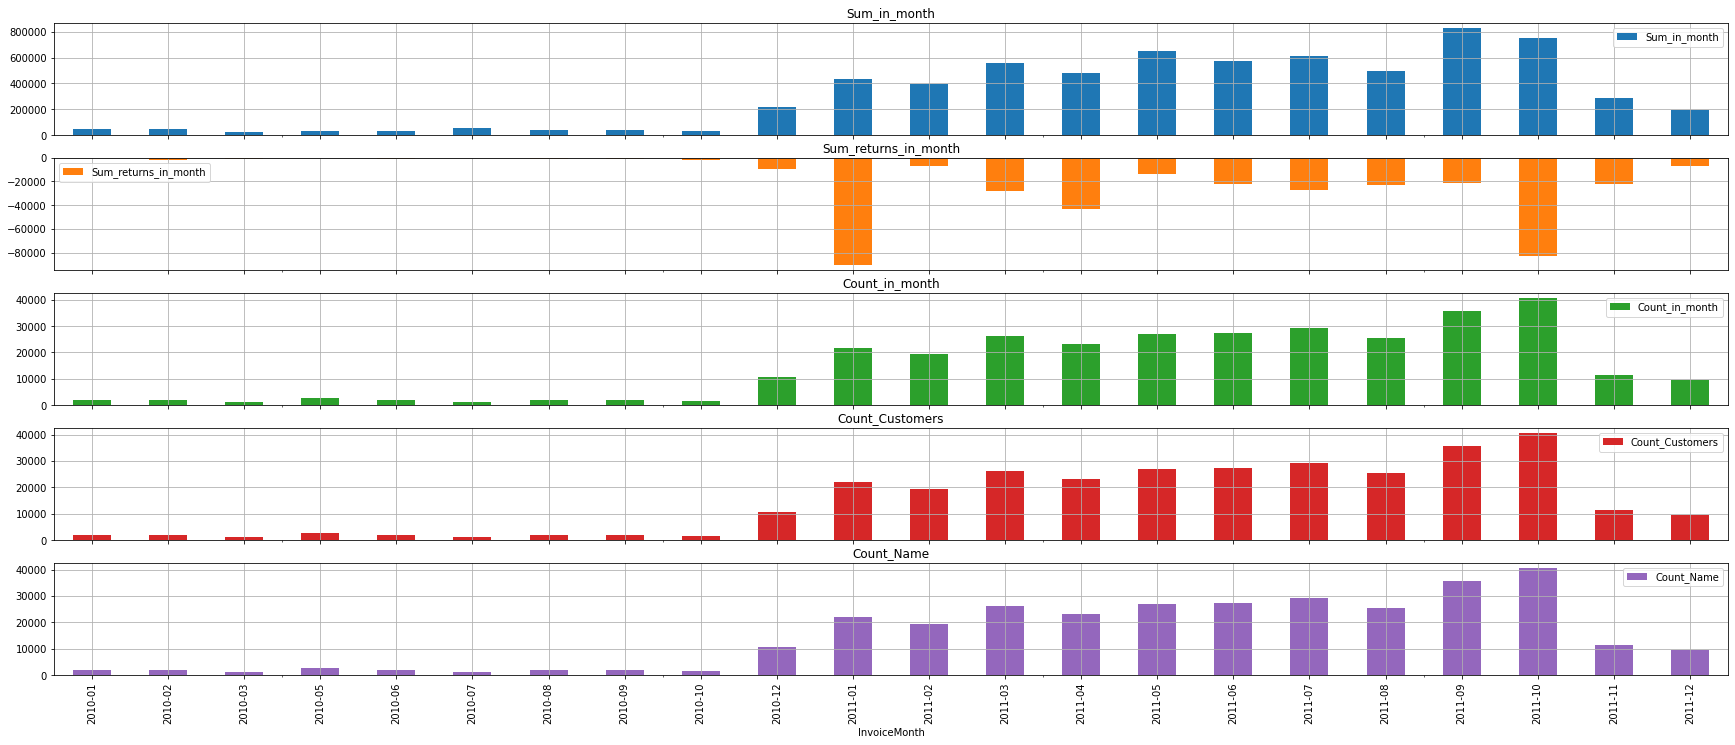

In [6]:
# Распределение количества заказов по месяцам
df_month_data = pd.DataFrame()
df_month_data['Sum_in_month'] = df_clean[['InvoiceMonth', 'Sum']].groupby(by = 'InvoiceMonth').sum()
# Сумма возвратов
df_month_data['Sum_returns_in_month'] = df_clean.loc[df_in['Sum'] < 0, ['InvoiceMonth', 'Sum']].groupby(by = 'InvoiceMonth').sum()
df_month_data['Count_in_month'] = df_clean['InvoiceMonth'].value_counts(sort = False).sort_index(ascending=True)
df_month_data['Count_Customers'] = df_clean[['InvoiceMonth', 'CustomerID']].groupby(by = 'InvoiceMonth').count()
df_month_data['Count_Name'] = df_clean[['InvoiceMonth', 'Name']].groupby(by = 'InvoiceMonth').count()
df_month_data.plot.bar(figsize =(30, 12),  grid = True,
                       subplots = True
                      )

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

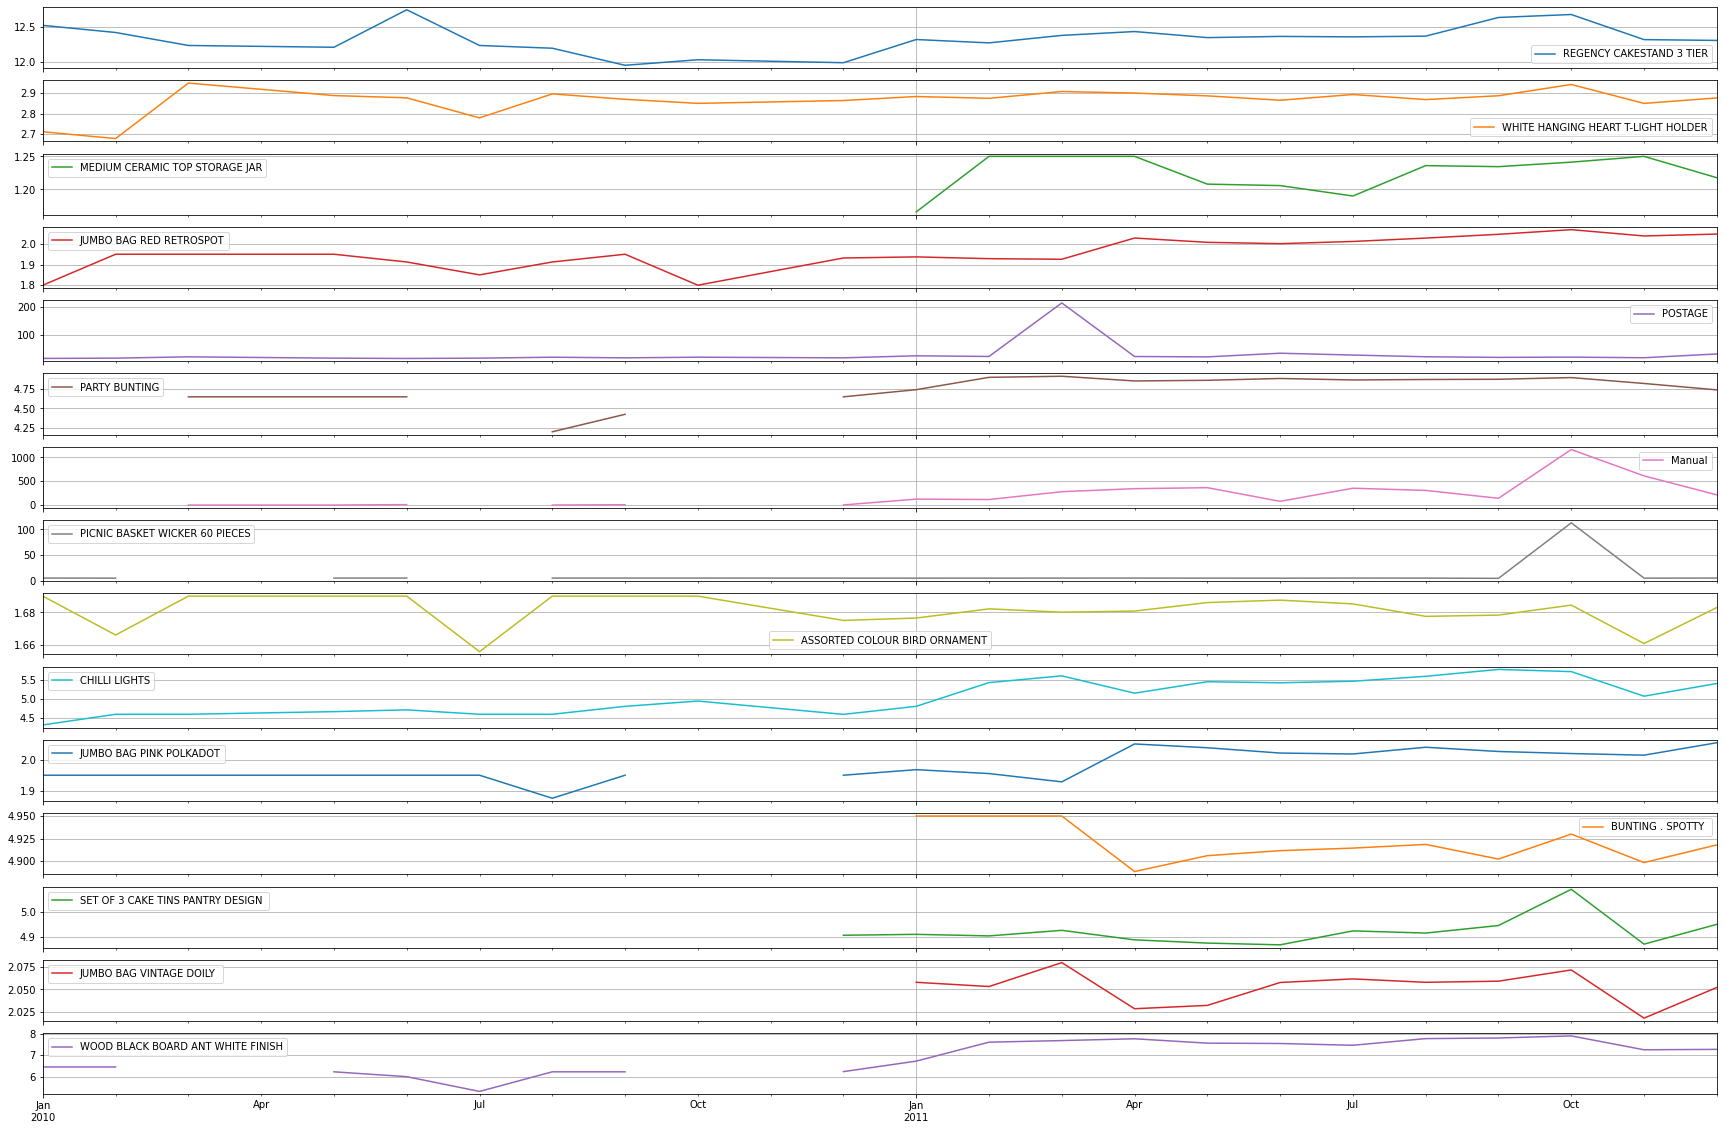

In [7]:
product_dict = dict(df_clean[['ProductID', 'Name']].drop_duplicates().values)
# Самые продаваемые товары
top_names = df_clean.loc[df_clean['Quantity'] > 0, ['ProductID', 'Sum']].groupby(by = 'ProductID').sum().sort_values(by = 'Sum', ascending = False)[:15]
# top_names
df_top_names = pd.DataFrame(index = top_names.index, columns = np.sort(df_in['InvoiceMonth'].unique()))
for month in df_top_names.columns:
    df_top_names[month] = df_clean.loc[(df_clean['InvoiceMonth'] == month) & (df_clean['ProductID'].isin(top_names.index)), 
                       ['ProductID', 'PricePerItem']].groupby(by = 'ProductID').mean()
         
#     break
df_top_names.rename(index = product_dict).transpose().plot(figsize =(30, 20),  grid = True,subplots = True)

## Преобразование данных

In [8]:
import data_preparation as dp
X_train, y_train, X_test, y_test = dp.Data_preparation(df_clean, month_list).preparation()

Клиентов: 4010


## Обучение модели

In [14]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

from xgboost import XGBClassifier

In [15]:
param_dist = {'max_depth' : 500,
              'tree_method' : 'exact',
            'use_label_encoder' : False, 
             'booster' : 'gbtree', 
             'nthread': -1}
model = XGBClassifier()
model.set_params(**param_dist)
print(X_train.shape)
model.fit(X_train, y_train,
          eval_metric='rmsle')
recall_score(y_train, model.predict(X_train)), recall_score(y_test, model.predict(X_test))

(44304, 45)


(0.6788196422467814, 0.18280949326491341)

## Оценка модели

Оптимальной считаю оценку модели **recall_score**

Так как даннае имеют сильный дисбаланс значение **True** (клиент совершил покупку в период) имеют примерно 10%
против **False** (клиент не совершил покупку в период) 90%

In [16]:
recall_score(y_train, model.predict(X_train)), recall_score(y_test, model.predict(X_test))

(0.6788196422467814, 0.18280949326491341)

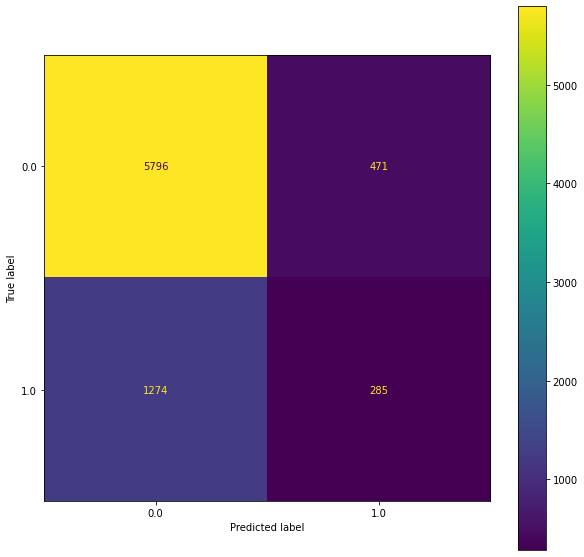

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test, ax = ax)

## Сохранение ответа

Вероятность совершения заказа клиентом в период 01.11.11 - 30.11.11

In [18]:
def save_csv(df, model):
    out = dp.Data_preparation(df_clean, month_list, goal = 'pred')
    X = out.preparation()
    Cust_list = out.Cust_list
    df_out = pd.DataFrame({'prob': model.predict_proba(X)[:,1]}, 
                          index = Cust_list)
    df_out.index.name = 'CustomerID'
    df_out.to_csv('pred.csv', sep = ';')
    return df_out
df_out = save_csv(df_clean, model)

Клиентов: 4010
